<a href="https://colab.research.google.com/github/MMBAYAR/Spring24_MIS356/blob/main/ML_Workshop1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#    Grafikler için ön tasarım ayarları yaptık

plt.rcParams['font.size'] = 12

# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams['figure.figsize'] = [8,4.5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#. Generating the predictos (X)

X = np.linspace( -1.5, 7, 10**5 )

#. Defining a trig function with a slightly positive trend
def f(x):
  return np.sin( (x-2)**2 ) + 0.4*x
#.   This is the regression function, the function that best explains the data
y = f(X) + np.random.normal(loc = 0, scale = 0.15, size = 10**5)

<Axes: >

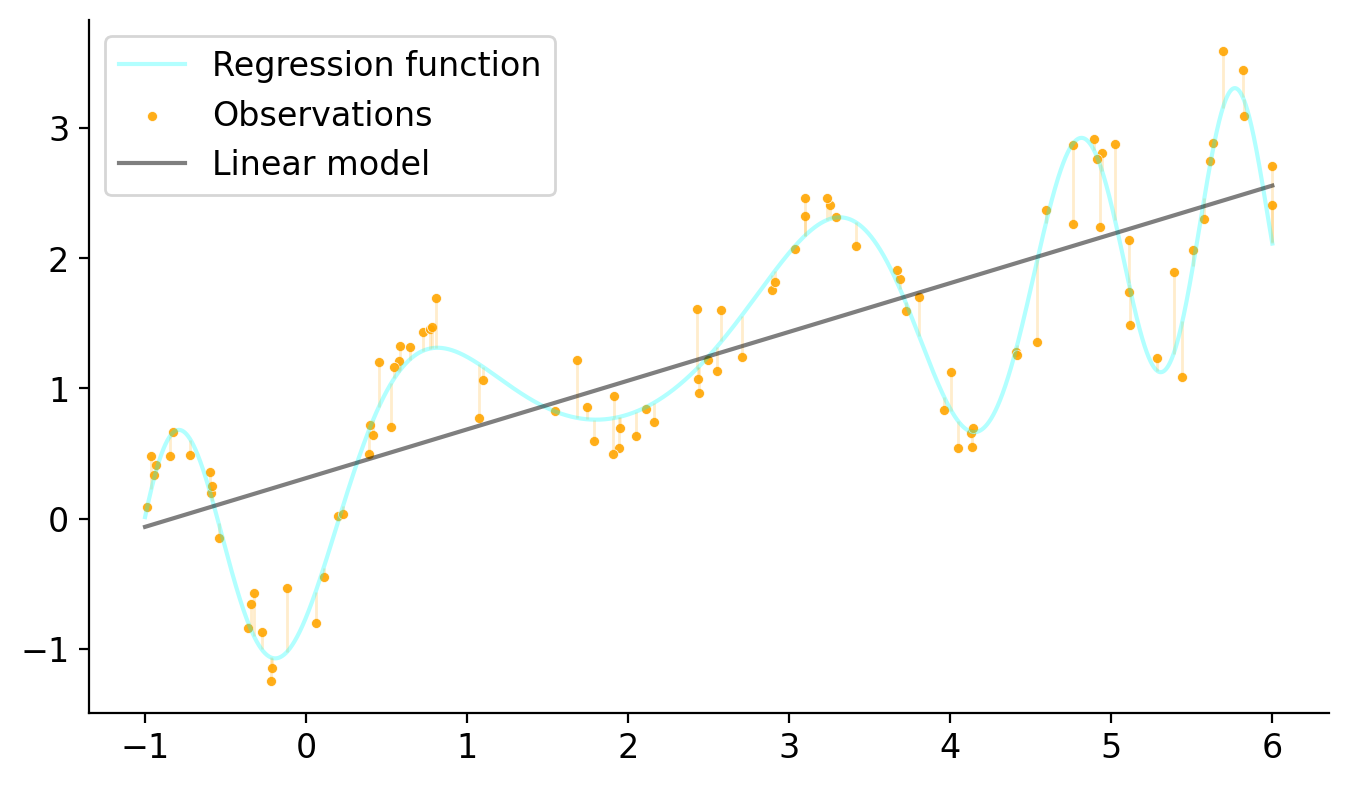

In [ ]:
np.random.seed(356)

x = np.linspace( -1, 6,10000 )

def f(x):
  return np.sin( (x-2)**2 ) + .4*x

y = f(x) + np.random.normal( 0,.25,len(x) )

sns.lineplot(
    x = x,
    y = f(x),
    alpha = .3,
    c = 'cyan',
    label = 'Regression function'
    )

plt.rcParams['lines.markersize'] = 3.6


k = 100
idx = np.random.choice(range(len(x)),size = k)
obs_x = np.array([x[i] for i in idx])
obs_y = np.array([y[i] for i in idx])
sns.scatterplot(
    x = obs_x,
    y = obs_y,
    alpha = .9,
    c = 'orange',
    label = 'Observations'
    )

for i in range(len(idx)):
  sns.lineplot(
      x = [obs_x[i],obs_x[i]],
      y = [f(obs_x[i]), obs_y[i]],
      c = 'orange'
  )

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(
    np.array([x[i] for i in idx]).reshape(-1, 1),
    obs_y
    )

sns.lineplot(
    x = x,
    y = model.predict(x.reshape(-1, 1)),
    label = 'Linear model',
    c = 'black',
    alpha = .5
)


In [ ]:
from sklearn.metrics import mean_squared_error as mse

#  Linear regression training set MSE
mse(y_true = obs_y,
    y_pred = model.predict(obs_x.reshape(-1, 1)))

#  Linear regression test set MSE
mse(y_true = y,
    y_pred = model.predict(x.reshape(-1, 1)))

0.4546328482442444

In [ ]:
#  Regression function training set MSE
mse(y_true = obs_y,
    y_pred = f(obs_x))

#  Regression function test set MSE
mse(y_true = y,
    y_pred = f(x))

0.06357077702290787

In [ ]:
#  Variance of the error term (irreducible error)
(y - f(x)).var()

0.06356996804581408

<Axes: >

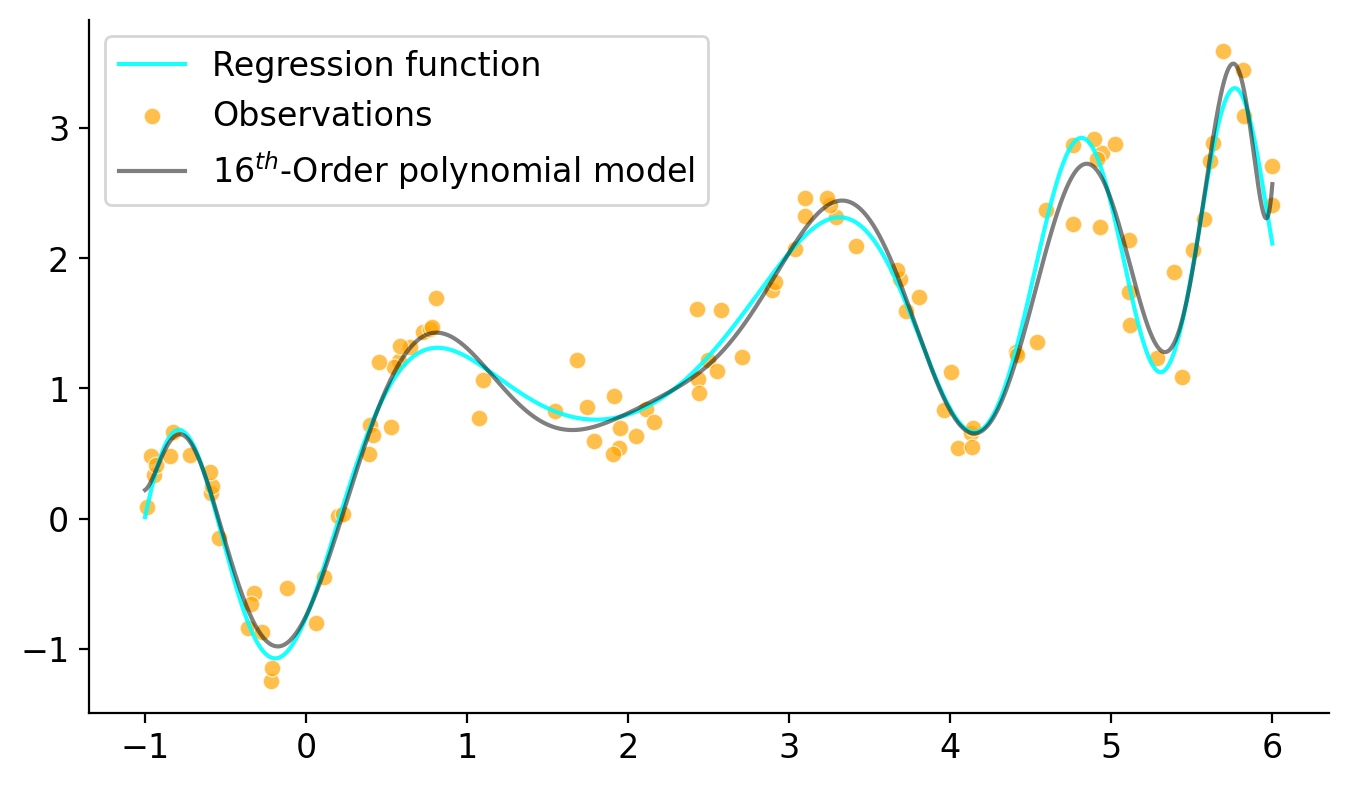

In [ ]:
i = 16

poly = PolynomialFeatures(degree = i,
                            include_bias = True
                            ).fit_transform(obs_x.reshape(-1, 1))
model = LinearRegression().fit(poly,obs_y)

sns.lineplot(
    x = x,
    y = f(x),
    alpha = .9,
    c = 'cyan',
    label = 'Regression function'
    )

sns.scatterplot(
      x = obs_x,
      y = obs_y,
      alpha = .7,
      c = 'orange',
      label = 'Observations'
      )

sns.lineplot(
      x = x,
      y = model.predict(PolynomialFeatures(degree = i,
                            include_bias = True
                            ).fit_transform(x.reshape(-1, 1))),
      label = '${}^{}$-Order polynomial model'.format(i,'{th}'),
      c = 'black',
      alpha = .5
  )

(0.0, 0.15)

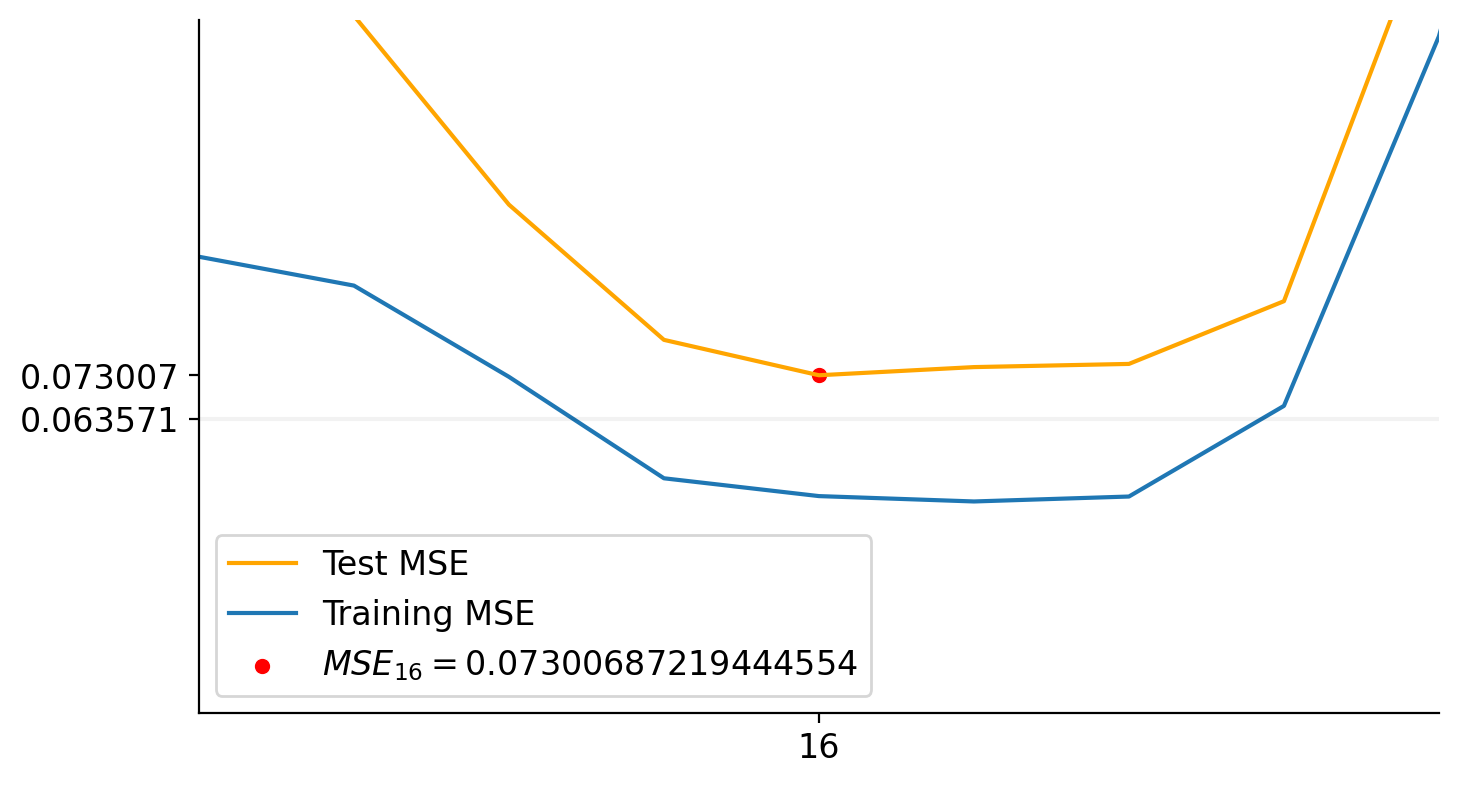

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

d = {}
t = {}

for i in range(1,30+1):

  poly = PolynomialFeatures(degree = i,
                            include_bias = True
                            ).fit_transform(obs_x.reshape(-1, 1))
  model = LinearRegression().fit(poly,obs_y)

  d[i] = mse(y_true = y,
             y_pred = model.predict(PolynomialFeatures(degree = i,
                                                       include_bias = True
                                                       ).fit_transform(x.reshape(-1, 1))))
  t[i] = mse(y_true = obs_y,
             y_pred = model.predict(PolynomialFeatures(degree = i,
                                                       include_bias = True
                                                       ).fit_transform(obs_x.reshape(-1, 1))))

sns.lineplot(
    pd.Series( d ),
    label = 'Test MSE',
    c = 'orange'
)
sns.lineplot(
    pd.Series( t ),
    label = 'Training MSE',
    # c = 'orange'
)

plt.rcParams['lines.markersize'] = 6

sns.scatterplot(
                x = [list(d.values()).index(pd.Series( d ).min()) + 1],
                y = pd.Series( d ).min(),
                label = '$MSE_{}={}$'.format({list(d.values()).index(pd.Series( d ).min()) + 1},
                                           pd.Series( d ).min()),
                c = 'red'
                )

sns.lineplot(
    x = [1,30],
    y = mse(y_true = y, y_pred = f(x)),
    c = 'black',
    alpha = .05
)

plt.xticks([1,list(d.values()).index(pd.Series( d ).min()) + 1,30])
plt.yticks([mse(y_true = y, y_pred = f(x)),d[16]])

plt.xlim([list(d.values()).index(pd.Series( d ).min()) + 1-4,list(d.values()).index(pd.Series( d ).min()) + 1+4]),
plt.ylim( [0,.15] )

<Axes: >

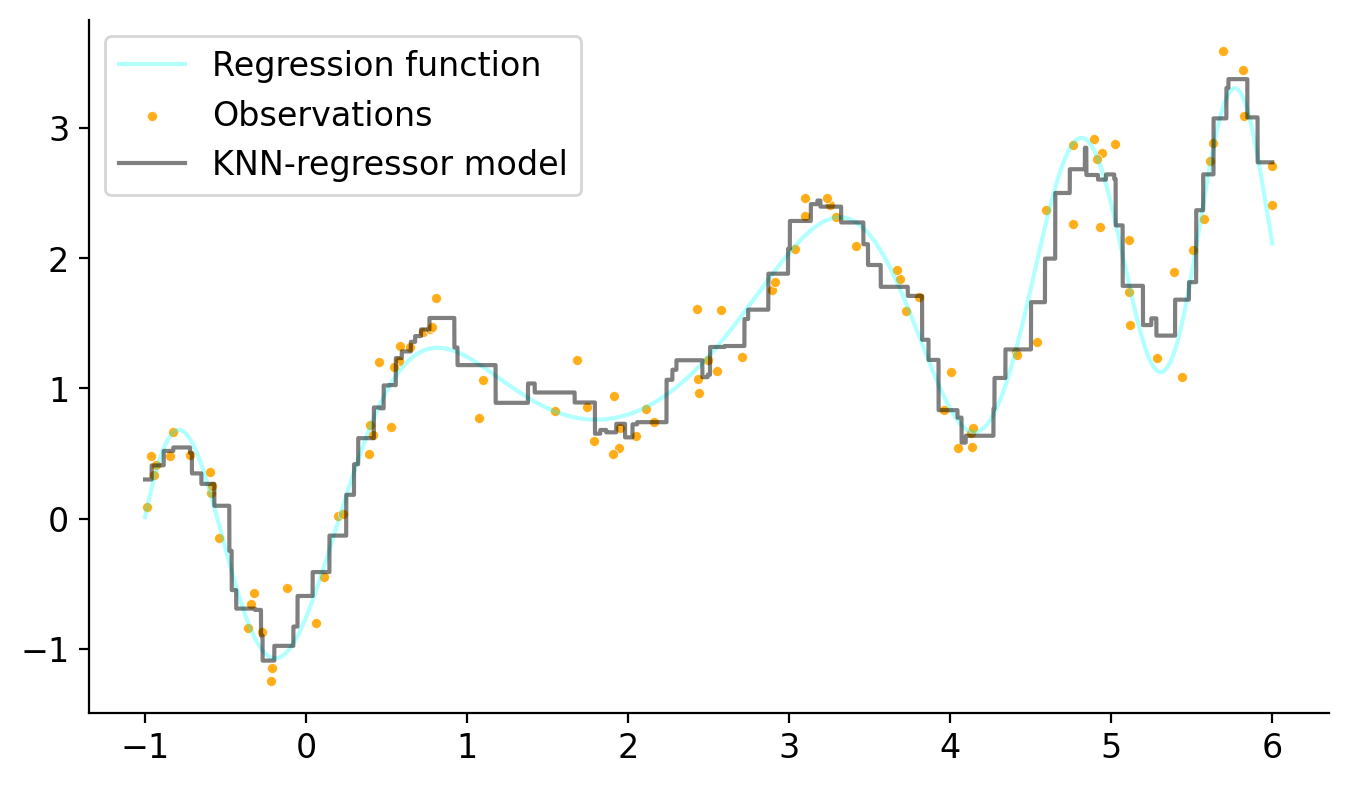

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors = 3).fit(obs_x.reshape(-1, 1),obs_y)
model.predict(obs_x.reshape(-1, 1))

sns.lineplot(
    x = x,
    y = f(x),
    alpha = .3,
    c = 'cyan',
    label = 'Regression function'
    )

sns.scatterplot(
    x = obs_x,
    y = obs_y,
    alpha = .9,
    c = 'orange',
    label = 'Observations'
    )

sns.lineplot(
    x = x,
    y = model.predict(x.reshape(-1, 1)),
    label = 'KNN-regressor model',
    c = 'black',
    alpha = .5
)

In [ ]:
#  KNN regressor training set MSE
mse(y_true = obs_y,
    y_pred = model.predict(obs_x.reshape(-1, 1)))

#  KNN regressor test set MSE
mse(y_true = y,
    y_pred = model.predict(x.reshape(-1, 1)))

0.09014914259823224

([<matplotlib.axis.YTick at 0x7ccf3d5bc730>,
 [Text(0, 0.0, '0.000'),
  Text(0, 0.06357077702290787, '0.064'),
  Text(0, 0.09014914259823224, '0.090'),
  Text(0, 1.0917300295149537, '1.092')])

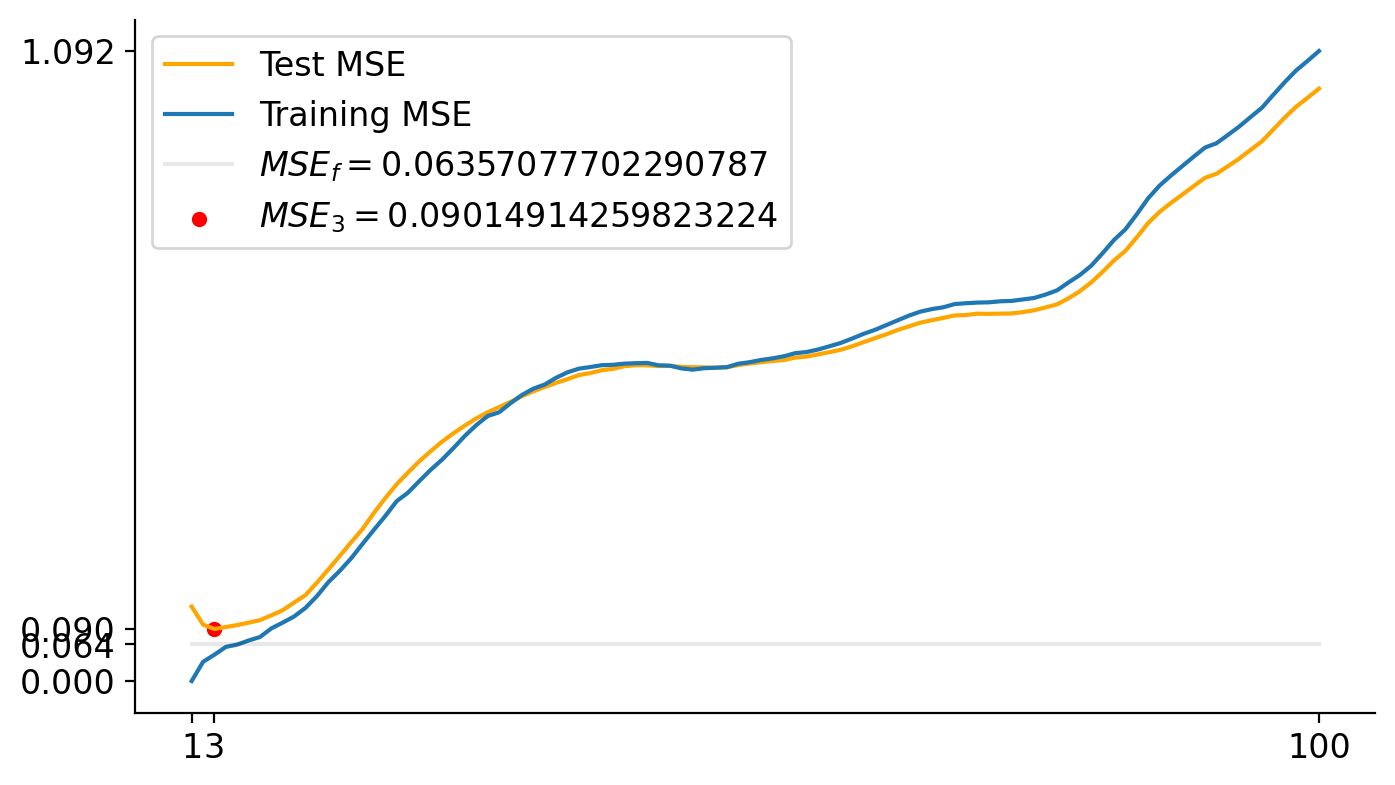

In [ ]:
d = {}
t = {}
for K in range(1,100+1):
  model = KNeighborsRegressor(n_neighbors = K).fit(obs_x.reshape(-1, 1),obs_y)
  d[K] = mse(y_true = y,
             y_pred = model.predict(x.reshape(-1, 1)))
  t[K] = mse(y_true = obs_y,
             y_pred = model.predict(obs_x.reshape(-1, 1)))

sns.lineplot(
    pd.Series( d ),
    label = 'Test MSE',
    c = 'orange'
)

sns.lineplot(
    pd.Series( t ),
    label = 'Training MSE',
)

sns.lineplot(
    x = [1,100],
    y = mse( y_true = y, y_pred = f(x) ),
    label = '$MSE_f={}$'.format(mse( y_true = y, y_pred = f(x) )),
    c = 'black',
    alpha = .09
)

plt.rcParams['lines.markersize'] = 6

sns.scatterplot(
    x = [list(d.values()).index( pd.Series( d ).min() ) + 1],
    y = [pd.Series( d ).min()],
    label = '$MSE_{} = {}$'.format(list(d.values()).index( pd.Series( d ).min() ) + 1,pd.Series( d ).min()),
    c = 'red',
)

plt.xticks( [1,list(d.values()).index( pd.Series( d ).min() ) + 1,100] )
plt.yticks( [pd.Series( t ).min(),
             mse( y_true = y,
             y_pred = f(x) ),
             pd.Series( d ).min(),pd.Series( t ).max()] )